# Advanced ML, Recomendation project : 

### Description of the General topic:  
 
A recommendation system is a class of machine learning tools designed to suggest 
relevant items to users based on their preferences, behaviors, and other users’ 
activities. They are widely used across e-commerce, streaming platforms, social 
media, and online advertising, aiming to enhance user experience by delivering 
personalized content or product suggestions.

## II - Content based filtering 

Content-based filtering recommends products based on item characteristics and user 
preferences. This approach analyzes the features of items (e.g., category, brand, price, 
description, etc.) and suggests items similar to those the user has interacted with in the 
past. 
 
In content-based Filtering we can use NLP similarity techniques such as tf-idf and 
Cosine similarity. 
Otherwise, we also can use Neural Networks: embeddings (Word2Vec, BERT 
embeddings) for textual data, we can capture richer semantic information about items.

Matrix factorization in recommendation systems generally works by decomposing a large user-item interaction matrix into two smaller matrices:

User Matrix (Q): Encodes latent features of users.

Item Matrix (P): Encodes latent features of items. 

The goal is to predict ratings or user preferences using the product of these two matrices: 
$$ R ≈Q⋅P^T $$

Where R is the user-item interaction matrix.

**PAPER : MATRIX FACTORIZATION TECHNIQUES FOR RECOMMENDER SYSTEMS**
- Yehuda Koren, Yahoo Research
- Robert Bell and Chris Volinsky, AT&T Labs—Research

# **Matrix Factorization Algorithm**

Matrix factorization is a collaborative filtering method used to predict missing entries in the user-item interaction matrix by decomposing it into two low-dimensional matrices:  Q (user embeddings) and P (item embeddings).

##### Initialize Matrices
- Randomly initialize  Q  and  P 
- Alternatively, use metadata embeddings to initialize these matrices.

---

##### Optimize for Loss Function
The goal is to minimize the squared error with regularization:

$$
L = \sum_{(i,j) \in R} \left( R_{ij} - Q_i \cdot P_j^\top \right)^2 + \lambda \left( \|Q_{i}\|^2 + \|P_{j}\|^2 \right)
$$

Where:
- R : The user-item interaction matrix.
- R_{ij}: Observed rating for user i and item j.
- Q_i : Latent vector for user i.
- P_j : Latent vector for item j.
- lambda : Regularization parameter to prevent overfitting.
- |Q|^2 and |P|^2 : Regularization terms for U and V.

---

##### Iterative Updates
- Update Q and P alternately to minimize the loss function L.
- Common optimization techniques include:
  
  
  - **Alternating Least Squares (ALS):**
  
    - Fix P and solve for Q, then fix Q and solve for P.
  
  - **Stochastic Gradient Descent (SGD):**
  
    - Update Q and P by iteratively taking gradient steps on L.

---

##### Output
- Q : Captures user preferences in a latent space.
- P : Captures item characteristics in the same latent space.

The predicted rating for user  i and item j is given by:

$$
\hat{R}_{ij} = Q_i \cdot P_j^\top
$$


In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import json 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### **Data loading :**

In [2]:
# DATA LOADING : 
file = "/Users/aminerazig/Desktop/ENSAE 3A/ADVANCED ML/Advanced ML-project/DATA/meta_Musical_Instruments.jsonl"

with open(file, 'r') as file:
    metadata = [json.loads(line) for line in file]

In [3]:
df_metadata = pd.DataFrame([
    {
        "id": item["parent_asin"],
        "main_category": item["main_category"],
        "title": item["title"],
        "average_rating": item["average_rating"],
        "rating_number": item["rating_number"],
        "features": item["features"],
        "description": item["description"],
        "price": item["price"],
        "images": item["images"],
        "videos": item["videos"],
        "store": item["store"],
        "categories": item["categories"],
        "details": item["details"],
        "bought_together": item["bought_together"],
    }
    for item in metadata
])


In [15]:
df_metadata.head(2)

,id,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,bought_together
0,B01M4HO6RK,Musical Instruments,Pearl Export Lacquer EXL725S/C249 5-Piece New ...,4.2,22,[Item may ship in more than one box and may ar...,[Introducing the best selling drum set of all ...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Best Selling Drum Set of All Time'...,Pearl,"[Musical Instruments, Drums & Percussion, Drum...","{'Item Weight': '33 pounds', 'Product Dimensio...",None
1,B00508JFE4,Musical Instruments,Behringer EUROPOWER EPQ900 Professional 900 Wa...,4.0,13,[2 x 390 Watts into 4 Ohms; 2 x 245 Watts into...,"[BEHRINGER EUROPOWER EPQ900, Professional 900-...",None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Behringer,"[Musical Instruments, Live Sound & Stage, Powe...","{'Item Weight': '10.8 pounds', 'Product Dimens...",None


In [4]:
df_recommendation = pd.read_csv("base de donnée_20_20.csv")
df_recommendation.head(2)

,user,id,rating
0,AE23JYHGEN3D35CHE5OQQYJOW5RA,B000EEHKVY,5.0
1,AE23JYHGEN3D35CHE5OQQYJOW5RA,B000TGSM6E,5.0


In [5]:
print(df_recommendation.shape)
df_recommendation = pd.merge(df_recommendation, df_metadata, left_on='id', right_on='id', how='left')
print(df_recommendation.shape)


(42626, 3)
(42626, 16)


In [19]:
df_recommendation.head(2)


,user,id,rating,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,bought_together
0,AE23JYHGEN3D35CHE5OQQYJOW5RA,B000EEHKVY,5.0,Musical Instruments,Hercules GS414B A/G Guitar Stand,4.8,605,"[AGS yoke System for security, SFF rubber on t...",[The Hercules GS414B Guitar stand features the...,55.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Is it Worth it? Hercules Guitar St...,HERCULES,"[Musical Instruments, Instrument Accessories, ...","{'Item Weight': '4.18 Pounds', 'Product Dimens...",None
1,AE23JYHGEN3D35CHE5OQQYJOW5RA,B000TGSM6E,5.0,Musical Instruments,D'Addario Accessories Gel Guitar Strap Pad - P...,4.5,788,[<p>The revolutionary Planet Waves gel pad tra...,"[Product Description, Revolutionaly gel pads t...",14.89,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'An easy fix to prevent annoying gu...,D'Addario Accessories,"[Musical Instruments, Instrument Accessories, ...","{'Item Weight': '5.6 ounces', 'Product Dimensi...",None


In [ ]:
import EDA_functions

EDA_functions.show_image(df_metadata["images"][0][0].get("large"))


### **Recommendation System (Test 1)** :

In [6]:
ratings = df_recommendation[['user', 'id', 'rating']]

# Create user-item interaction matrix
user_ids = ratings['user'].unique()
item_ids = ratings['id'].unique()
user_id_map = {id: idx for idx, id in enumerate(user_ids)}
item_id_map = {id: idx for idx, id in enumerate(item_ids)}
ratings['user_idx'] = ratings['user'].map(user_id_map)
ratings['item_idx'] = ratings['id'].map(item_id_map)


/var/folders/85/w86zwk1d6rsg9ct11l1475ww0000gn/T/ipykernel_52283/56293197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['user_idx'] = ratings['user'].map(user_id_map)
/var/folders/85/w86zwk1d6rsg9ct11l1475ww0000gn/T/ipykernel_52283/56293197.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['item_idx'] = ratings['id'].map(item_id_map)


##### Loss function $\mathbf{L}$ :

$$
L = \sum_{(i,j) \in R} \left( R_{ij} - Q_i \cdot P_j^\top \right)^2 + \lambda \left( \|Q_{i}\|^2 + \|P_{j}\|^2 \right)
$$

##### Dérivée par rapport à $\mathbf{p}_u$ :

$$

\frac{\partial L}{\partial \mathbf{p}_u} = -2 (r_{ui} - \mathbf{q}_i^\top \mathbf{p}_u) \mathbf{q}_i + 2\lambda \mathbf{p}_u
$$


##### Dérivée par rapport à $\mathbf{q}_i$ :

$$

\frac{\partial L}{\partial \mathbf{q}_i} = -2 (r_{ui} - \mathbf{q}_i^\top \mathbf{p}_u) \mathbf{p}_u + 2\lambda \mathbf{q}_i
$$


##### **1rst Training  with fixed regularization term on latent vectors** : 
##### Optimizer : Gradient descent algo

In [53]:

# Hyperparameters
num_factors = 10  # Latent space dimensionality
learning_rate = 0.01
reg_lambda = 0.1
num_epochs = 30

# Initialization of the latent factor matrices
num_users = len(user_ids)
num_items = len(item_ids)
P = np.random.normal(0, 0.1, (num_users, num_factors))  # User latent factors
Q = np.random.normal(0, 0.1, (num_items, num_factors))  # Item latent factors

loss_evolution = []
# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    for _, row in ratings.iterrows():
        u, i, r_ui = row['user_idx'], row['item_idx'], row['rating']
        
        prediction = np.dot(P[u], Q[i])
        error = r_ui - prediction

        # Update user and item latent factors
        P[u] += learning_rate * ( (error * Q[i] - reg_lambda * P[u]))
        Q[i] += learning_rate * ( (error * P[u] - reg_lambda * Q[i]))

        # loss
        total_loss += error ** 2 + reg_lambda * (np.linalg.norm(P[u]) ** 2 + np.linalg.norm(Q[i]) ** 2)
        loss_evolution.append(total_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}")



Epoch 1/30, Loss: 907158.0896
Epoch 2/30, Loss: 895806.0026
Epoch 3/30, Loss: 818658.5006
Epoch 4/30, Loss: 600774.4290
Epoch 5/30, Loss: 352178.6031
Epoch 6/30, Loss: 197429.2827
Epoch 7/30, Loss: 128199.6613
Epoch 8/30, Loss: 100327.1902
Epoch 9/30, Loss: 88471.8012
Epoch 10/30, Loss: 82679.9328
Epoch 11/30, Loss: 79352.4495
Epoch 12/30, Loss: 77138.1669
Epoch 13/30, Loss: 75486.4474
Epoch 14/30, Loss: 74151.9068
Epoch 15/30, Loss: 73014.8852
Epoch 16/30, Loss: 72011.5998
Epoch 17/30, Loss: 71105.1583
Epoch 18/30, Loss: 70272.6976
Epoch 19/30, Loss: 69499.2461
Epoch 20/30, Loss: 68774.5725
Epoch 21/30, Loss: 68091.4513
Epoch 22/30, Loss: 67444.6470
Epoch 23/30, Loss: 66830.2866
Epoch 24/30, Loss: 66245.4522
Epoch 25/30, Loss: 65687.9052
Epoch 26/30, Loss: 65155.8939
Epoch 27/30, Loss: 64648.0149
Epoch 28/30, Loss: 64163.1117
Epoch 29/30, Loss: 63700.1999
Epoch 30/30, Loss: 63258.4126


### **Prediction :** 

In [73]:
def prediction_rating ( user_id , item_id ) :
    user_idx = user_id_map[user_id] # nous permer d'avoir l'indice i 
    item_idx = item_id_map[item_id] # nous permet d'avoir l'indice j de la formule

    predicted_rating = np.dot(P[user_idx], Q[item_idx])
    print(f"Predicted Rating for user-item pair: {predicted_rating:.2f}")

    return predicted_rating

In [ ]:
user_id = "AHZYZ2BUDD7WAJPW5G6K2DK5LYPQ"
item_id = "B095XZJ99J"
prediction_rating( user_id , item_id )

Predicted Rating for user-item pair: 4.90


In [74]:

ratings_list = []
for _, row in ratings.iterrows() : 
    user_id = row['user']
    item_id =  row['id']
    pred = prediction_rating( user_id , item_id )
    ratings_list.append(pred)

Predicted Rating for user-item pair: 5.15
Predicted Rating for user-item pair: 4.24
Predicted Rating for user-item pair: 4.74
Predicted Rating for user-item pair: 4.60
Predicted Rating for user-item pair: 4.27
Predicted Rating for user-item pair: 4.31
Predicted Rating for user-item pair: 4.65
Predicted Rating for user-item pair: 4.75
Predicted Rating for user-item pair: 4.75
Predicted Rating for user-item pair: 4.42
Predicted Rating for user-item pair: 4.60
Predicted Rating for user-item pair: 4.86
Predicted Rating for user-item pair: 4.90
Predicted Rating for user-item pair: 4.82
Predicted Rating for user-item pair: 4.42
Predicted Rating for user-item pair: 4.71
Predicted Rating for user-item pair: 4.46
Predicted Rating for user-item pair: 4.93
Predicted Rating for user-item pair: 4.53
Predicted Rating for user-item pair: 5.03
Predicted Rating for user-item pair: 5.24
Predicted Rating for user-item pair: 4.93
Predicted Rating for user-item pair: 4.90
Predicted Rating for user-item pai

/var/folders/85/w86zwk1d6rsg9ct11l1475ww0000gn/T/ipykernel_52283/582574831.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.array(ratings_list), bw=0.5)
/Users/aminerazig/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

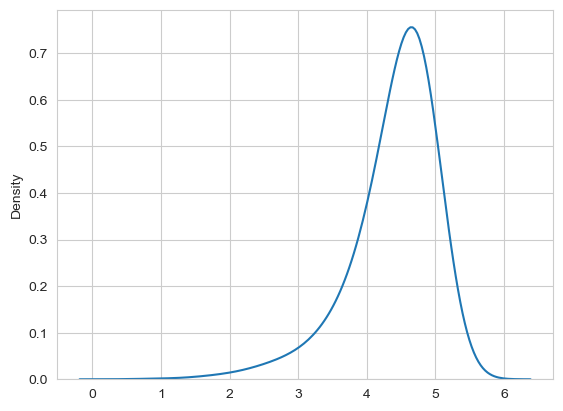

In [75]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(ratings_list), bw=0.5)

##### We may want to normlize the prediction a little bit or to spread it : (!!! it can be a bad idea to check ) 

/var/folders/85/w86zwk1d6rsg9ct11l1475ww0000gn/T/ipykernel_52283/1515708834.py:32: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(spread_ratings(np.array(ratings_list)), bw=0.5)
/Users/aminerazig/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

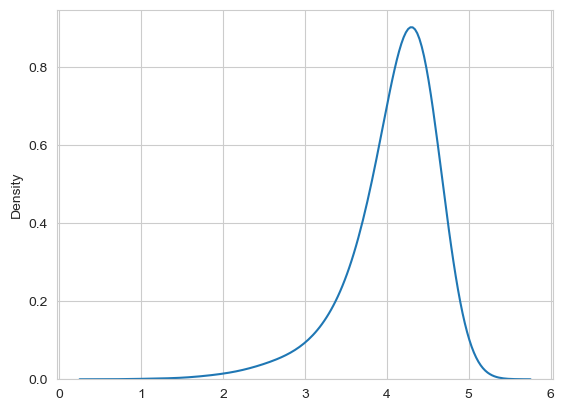

In [81]:
def normalize_ratings(predictions, min_value=1, max_value=5):
    r_min = np.min(predictions)
    r_max = np.max(predictions)
    
    normalized_predictions = min_value + (predictions - r_min) * (max_value - min_value) / (r_max - r_min)
    
    return normalized_predictions


def spread_ratings(predictions, min_value=1, max_value=5):
    r_min = np.min(predictions)
    r_max = np.max(predictions)
    if r_min == r_max:
        return np.full_like(predictions, min_value)

    # Rescale to [0, 1]
    normalized_predictions = (predictions - r_min) / (r_max - r_min)
    # Spread evenly in [1, 5]
    spread_predictions = min_value + normalized_predictions * (max_value - min_value)
    
    return spread_predictions

sns.set_style('whitegrid')
sns.kdeplot(spread_ratings(np.array(ratings_list)), bw=0.5)

##### **2nd Training  with  adaptative regularization term on latent vectors** : 

In [28]:

# Hyperparameters
num_factors = 10  # Latent space dimensionality
learning_rate = 0.01
reg_lambda = 0.1
num_epochs = 30

# Initialize latent factor matrices
num_users = len(user_ids)
num_items = len(item_ids)
P = np.random.normal(0, 0.1, (num_users, num_factors))  # User latent factors
Q = np.random.normal(0, 0.1, (num_items, num_factors))  # Item latent factors

# fréquences des utilisateurs et des items
user_frequencies = ratings['user_idx'].value_counts().to_dict()
item_frequencies = ratings['item_idx'].value_counts().to_dict()

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    for _, row in ratings.iterrows():
        u, i, r_ui = row['user_idx'], row['item_idx'], row['rating']
        freq_user = user_frequencies[u]
        freq_item = user_frequencies[i]
        
        prediction = np.dot(P[u], Q[i])
        error = r_ui - prediction

        reg_u = reg_lambda / np.sqrt(freq_user)  # Régularisation utilisateur
        reg_i = reg_lambda / np.sqrt(freq_item)  # Régularisation item


        # Update user and item latent factors
        P[u] += learning_rate * (error * Q[i] - reg_u * P[u])
        Q[i] += learning_rate * (error * P[u] - reg_i * Q[i])

        # Accumulate loss
        total_loss += error ** 2 + reg_lambda * (np.linalg.norm(P[u]) ** 2 + np.linalg.norm(Q[i]) ** 2)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}")



Epoch 1/30, Loss: 907348.9682
Epoch 2/30, Loss: 898941.2323
Epoch 3/30, Loss: 842017.8332
Epoch 4/30, Loss: 652265.5792
Epoch 5/30, Loss: 396011.5368
Epoch 6/30, Loss: 220752.3175
Epoch 7/30, Loss: 139058.5218
Epoch 8/30, Loss: 106254.5533
Epoch 9/30, Loss: 92702.4295
Epoch 10/30, Loss: 86358.9640
Epoch 11/30, Loss: 82865.7705
Epoch 12/30, Loss: 80615.0633
Epoch 13/30, Loss: 78966.9207
Epoch 14/30, Loss: 77642.8981
Epoch 15/30, Loss: 76511.3746
Epoch 16/30, Loss: 75505.1956
Epoch 17/30, Loss: 74587.6057
Epoch 18/30, Loss: 73737.2027
Epoch 19/30, Loss: 72940.8474
Epoch 20/30, Loss: 72190.0946
Epoch 21/30, Loss: 71479.2828
Epoch 22/30, Loss: 70804.4539
Epoch 23/30, Loss: 70162.7155
Epoch 24/30, Loss: 69551.8510
Epoch 25/30, Loss: 68970.0754
Epoch 26/30, Loss: 68415.8810
Epoch 27/30, Loss: 67887.9377
Epoch 28/30, Loss: 67385.0296
Epoch 29/30, Loss: 66906.0145
Epoch 30/30, Loss: 66449.7988


### **Prediction :** 

In [59]:
user_id = "AE2BETZH5DRTVRVCBYP7PA4NDBPA"
item_id = "B07ZWHY5TD"
prediction_rating( user_id , item_id )

Predicted Rating for user-item pair: 3.21


In [61]:
for _, row in ratings[ratings['user']== "AE2BETZH5DRTVRVCBYP7PA4NDBPA"].iterrows() : 
    user_id = row['user']
    item_id =  row['id']
    prediction_rating( user_id , item_id )

Predicted Rating for user-item pair: 4.05
Predicted Rating for user-item pair: 3.97
Predicted Rating for user-item pair: 4.21
Predicted Rating for user-item pair: 3.21
Predicted Rating for user-item pair: 3.48
Predicted Rating for user-item pair: 4.12


In [60]:
ratings[ratings['user']== "AE2BETZH5DRTVRVCBYP7PA4NDBPA"]

,user,id,rating,user_idx,item_idx
101,AE2BETZH5DRTVRVCBYP7PA4NDBPA,B00WHLLDWO,5.0,10,97
102,AE2BETZH5DRTVRVCBYP7PA4NDBPA,B012VQ5A7S,5.0,10,3
103,AE2BETZH5DRTVRVCBYP7PA4NDBPA,B07C9YCY5J,5.0,10,98
104,AE2BETZH5DRTVRVCBYP7PA4NDBPA,B07ZWHY5TD,2.0,10,99
105,AE2BETZH5DRTVRVCBYP7PA4NDBPA,B09KR857F4,2.0,10,100
106,AE2BETZH5DRTVRVCBYP7PA4NDBPA,B0BTC9YJ2W,5.0,10,59


-----
### **Recommendation System (Test 2)** :

In [30]:
# Encode user and product IDs as integers
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

df_recommendation['user_encoded'] = user_encoder.fit_transform(df_recommendation['user'])
df_recommendation['item_encoded'] = item_encoder.fit_transform(df_recommendation['id'])
df_recommendation['main_category_encoded'] = LabelEncoder().fit_transform(df_recommendation['main_category'])
# Create a mapping for reverse lookups
user_mapping = dict(zip(df_recommendation['user_encoded'], df_recommendation['user']))
item_mapping = dict(zip(df_recommendation['item_encoded'], df_recommendation['id']))

# Split data into training and testing sets
train, test = train_test_split(df_recommendation, test_size=0.2, random_state=42)


In [31]:
# Neural network for embedding metadata : 

import torch
import torch.nn as nn
import torch.optim as optim


class MetadataEmbedding(nn.Module):
    def __init__(self, main_category_vocab_size, embedding_dim=50):
        super(MetadataEmbedding, self).__init__()
        # Embedding layer for main category
        self.main_category_embedding = nn.Embedding(main_category_vocab_size, embedding_dim)
        # Dense layers for other metadata
        self.fc = nn.Sequential(
            nn.Linear(embedding_dim + 1, 128),
            nn.ReLU(),
            nn.Linear(128, embedding_dim)
        )

    def forward(self, main_category, price):
        # Embed main category
        main_category_embedded = self.main_category_embedding(main_category)
        # Concatenate with price (normalize price if needed)
        x = torch.cat([main_category_embedded, price.unsqueeze(1)], dim=1)
        # Pass through dense layers
        return self.fc(x)


In [50]:
class MatrixFactorizationWithMetadata(nn.Module):
    def __init__(self, n_users, n_items, metadata_embedding_model, embedding_dim=50):
        super(MatrixFactorizationWithMetadata, self).__init__()
        self.user_embedding = nn.Embedding(n_users, embedding_dim)
        self.item_embedding = nn.Embedding(n_items, embedding_dim)
        self.metadata_embedding_model = metadata_embedding_model
        self.fc = nn.Sequential(
            nn.Linear(embedding_dim * 2, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # Predict rating
        )

    def forward(self, user, item, metadata):
        user_embedded = self.user_embedding(user)
        item_embedded = self.item_embedding(item)

        # Ensure metadata matches item dimensions
        main_category, price = metadata
        metadata_embedded = self.metadata_embedding_model(main_category, price)

        # Ensure item_embedded and metadata_embedded shapes match
        metadata_embedded = metadata_embedded[:item_embedded.size(0)]  # Truncate metadata to match items if needed

        # Combine item embedding with metadata embedding
        item_embedded = item_embedded + metadata_embedded
        # Concatenate user and item embeddings
        x = torch.cat([user_embedded, item_embedded], dim=1)
        return self.fc(x)



In [52]:
# Prepare data
n_users = df_recommendation['user_encoded'].max() + 1
n_items = df_recommendation['item_encoded'].max() + 1
main_category_vocab_size = df_recommendation['main_category_encoded'].max() + 1

metadata_embedding_model = MetadataEmbedding(main_category_vocab_size, embedding_dim=50)
model = MatrixFactorizationWithMetadata(n_users, n_items, metadata_embedding_model, embedding_dim=50)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
train_users = torch.tensor(train['user_encoded'].values, dtype=torch.long)
train_items = torch.tensor(train['item_encoded'].values, dtype=torch.long)
train_ratings = torch.tensor(train['rating'].values, dtype=torch.float32)
train_main_category = torch.tensor(train['main_category_encoded'].values, dtype=torch.long)
#train_price = torch.tensor(train['price'].values, dtype=torch.float32)

test_users = torch.tensor(test['user_encoded'].values, dtype=torch.long)
test_items = torch.tensor(test['item_encoded'].values, dtype=torch.long)
test_ratings = torch.tensor(test['rating'].values, dtype=torch.float32)
test_main_category = torch.tensor(test['main_category_encoded'].values, dtype=torch.long)
#test_price = torch.tensor(test['price'].values, dtype=torch.float32)
# Ensure 'price' column is numeric
train['price'] = pd.to_numeric(train['price'], errors='coerce')
test['price'] = pd.to_numeric(test['price'], errors='coerce')

# Replace NaN values with a default (e.g., 0.0)
train['price'] = train['price'].fillna(0.0)
test['price'] = test['price'].fillna(0.0)

# Convert to PyTorch tensors
train_price = torch.tensor(train['price'].values, dtype=torch.float32)
test_price = torch.tensor(test['price'].values, dtype=torch.float32)

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    predictions = model(train_users, train_items, (train_main_category, train_price)).squeeze()
    loss = criterion(predictions, train_ratings)
    # Backward pass
    loss.backward()
    optimizer.step()

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_predictions = model(test_users, test_items, (test_main_category, test_price)).squeeze()
        test_loss = criterion(test_predictions, test_ratings)
    print(f"Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")


Epoch 1, Train Loss: 21.3363, Test Loss: 19.0558
Epoch 2, Train Loss: 19.0258, Test Loss: 17.1676
Epoch 3, Train Loss: 17.1264, Test Loss: 15.6005
Epoch 4, Train Loss: 15.5549, Test Loss: 14.4407
Epoch 5, Train Loss: 14.4009, Test Loss: 13.7988
Epoch 6, Train Loss: 13.7790, Test Loss: 13.5574
Epoch 7, Train Loss: 13.5633, Test Loss: 13.2602
Epoch 8, Train Loss: 13.2815, Test Loss: 12.6653
Epoch 9, Train Loss: 12.6868, Test Loss: 11.8981
Epoch 10, Train Loss: 11.9116, Test Loss: 11.1203
Epoch 11, Train Loss: 11.1241, Test Loss: 10.4146
Epoch 12, Train Loss: 10.4078, Test Loss: 9.8105
Epoch 13, Train Loss: 9.7975, Test Loss: 9.2684
Epoch 14, Train Loss: 9.2543, Test Loss: 8.7136
Epoch 15, Train Loss: 8.7007, Test Loss: 8.1098
Epoch 16, Train Loss: 8.1029, Test Loss: 7.4356
Epoch 17, Train Loss: 7.4366, Test Loss: 6.7234
Epoch 18, Train Loss: 6.7343, Test Loss: 6.0188
Epoch 19, Train Loss: 6.0418, Test Loss: 5.3318
Epoch 20, Train Loss: 5.3667, Test Loss: 4.6560
Epoch 21, Train Loss: 4.69

In [41]:
# Create reverse mapping
user_index_mapping = {v: k for k, v in user_mapping.items()}


In [45]:
# Ensure 'price' column is numeric
df_recommendation['price'] = pd.to_numeric(df_recommendation['price'], errors='coerce')
df_recommendation['price'] = df_recommendation['price'].fillna(0.0)

In [ ]:
def recommend(user_id, model, df, user_index_mapping, item_mapping, n_recommendations=5):
    # Get user index
    user_idx = user_index_mapping[user_id]
    all_items = torch.arange(n_items)
    user_tensor = torch.tensor([user_idx] * n_items, dtype=torch.long)

    # Filter metadata for the items in all_items
    item_ids = df.loc[df['item_encoded'].isin(all_items.numpy()), 'item_encoded'].values
    filtered_metadata = df[df['item_encoded'].isin(item_ids)]
    
    metadata_main_category = torch.tensor(filtered_metadata['main_category_encoded'].values, dtype=torch.long)
    metadata_price = torch.tensor(filtered_metadata['price'].values, dtype=torch.float32)
    metadata = (metadata_main_category, metadata_price)

    # Predict scores
    scores = model(user_tensor, all_items, metadata).squeeze().detach().numpy()

    # Get top recommendations
    top_indices = np.argsort(scores)[::-1][:n_recommendations]
    recommended_items = [item_mapping[idx] for idx in top_indices]
    return recommended_items



### **RECOMMENDATION :**

In [80]:
user_id = "AE23WLBRYKEC67DM43M6E2MF7GPQ"
recommendations = recommend(user_id, model, df_recommendation, user_index_mapping, item_mapping)
print(f"Top recommendations for user {user_id}: {recommendations}")

Top recommendations for user AE23WLBRYKEC67DM43M6E2MF7GPQ: ['B0BXT41XC6', 'B0B176CWVM', 'B0158GWWJ2', 'B09R6GDRV4', 'B07JL1KFT3']


In [82]:
recommended_info = df_metadata[df_metadata['id'].isin(recommendations)]

i = 1
for index, row in recommended_info.iterrows(): 
    print (f" Recommendation number {i} : { row['title']} \n - Description :{ row['description']}  \n Price :{ row['price']}  \n -Categories :{ row['categories']}  \n")
    try : 
        EDA_functions.show_image(row["images"][0].get("thumb"))
    except : 
        print ("No image available")


 Recommendation number 1 : JIM DUNLOP 498P1.0 Jazz III XL, Blue, 1.0mm, 12/Player's Pack 
 - Description :['498P1.0 Tortex Jazz3 Xl-12/Pp']  
 Price :4.99  
 -Categories :['Musical Instruments', 'Instrument Accessories', 'Guitar & Bass Accessories', 'Picks & Pick Holders', 'Picks']  



 Recommendation number 1 : Shubb S1 Stainless Steel Guitar Capo for Steel String Guitars 
 - Description :['The Shubb Deluxe S Capo is made of stainless steel with a new roller design that resists wear and opens and closes more smoothly that the original Shubb capo. Restyled lever makes the Deluxe Capo easier to handle.']  
 Price :21.99  
 -Categories :['Musical Instruments', 'Instrument Accessories', 'Guitar & Bass Accessories', 'Capos']  



 Recommendation number 1 : Musiclily Fuzz Pedal, Pro Octave Fuzz Guitar Pedal, DC 9V Adapter Powered True Bypass for Electric Guitar and Bass (Green) 
 - Description :[]  
 Price :30.61  
 -Categories :['Musical Instruments', 'Amplifiers & Effects', 'Guitar Effects', 'Electric Guitar Effects', 'Distortion & Overdrive']  



 Recommendation number 1 : Wampler Ego Compressor V2 Guitar Effects Pedal 
 - Description :['From silky smooth sustain to full out country chicken-picken territory, the Wampler Ego Compressor is the most versatile compressor pedal on the market.']  
 Price :199.97  
 -Categories :['Musical Instruments', 'Amplifiers & Effects', 'Guitar Effects', 'Electric Guitar Effects', 'Compression']  



 Recommendation number 1 : Fender 3-Position Vintage-Style Stratocaster/Telecaster Pickup Selector Switch 
 - Description :['Whether replacing a worn switch or just adding tonal variety to your favorite instrument, Fender offers high-quality switches with knobs and mounting hardware.']  
 Price :9.99  
 -Categories :['Musical Instruments', 'Instrument Accessories', 'Guitar & Bass Accessories', 'Electric Guitar Parts', 'Electronics']  

